In [1]:
%load_ext autoreload
%autoreload 2

from model_utils import load_model
from DisruptionPredictors import DisruptionPredictorSM, DisruptionPredictorRF, DisruptionPredictorKM
from Experiments import Experiment
from plot_experiments import *

device = 'cmod'
#dataset_path = 'no_ufo_flattop_1452_shots_50%_disruptive'
#dataset_path = 'random_flattop_256_shots_60%_disruptive'
dataset_path = 'no_ufo_flattop_7736_shots_6%_disruptive'
stack_dataset_path = 'no_ufo_flattop_7736_shots_6%_disruptive/stack_4'

# Load models and create disruption predictors

cph_model, cph_features = load_model('cph', device, dataset_path)
cph_predictor = DisruptionPredictorSM("Cox Proportional Hazards", cph_model, cph_features)
cph_experiment = Experiment(device, dataset_path, cph_predictor, 'CPH')

cph_stack_model, cph_stack_features = load_model('cph', device, stack_dataset_path)
cph_stack_predictor = DisruptionPredictorSM("Cox Proportional Hazards", cph_stack_model, cph_stack_features)
cph_stack_experiment = Experiment(device, stack_dataset_path, cph_stack_predictor, 'CPH stack')

#dcph_model, dcph_features = load_model('dcph', device, dataset_path)
#dcph_predictor = DisruptionPredictorSM("Deep Cox Proportional Hazards", dcph_model, dcph_features)

#dcm_model, dcm_transformer, dcm_features = load_model('dcm', device, dataset_path)
#dcm_predictor = DisruptionPredictorSM("Deep Cox Mixture", dcm_model, dcm_features, dcm_transformer)

dsm_model, dsm_features = load_model('dsm', device, dataset_path)
dsm_predictor = DisruptionPredictorSM("Deep Survival Machines", dsm_model, dsm_features)
dsm_experiment = Experiment(device, dataset_path, dsm_predictor, 'DSM')

dsm_stack_model, dsm_stack_features = load_model('dsm', device, stack_dataset_path)
dsm_stack_predictor = DisruptionPredictorSM("Deep Survival Machines", dsm_stack_model, dsm_stack_features)
dsm_stack_experiment = Experiment(device, stack_dataset_path, dsm_stack_predictor, 'DSM stack')

rf_model, rf_features = load_model('rf', device, dataset_path)
rf_predictor = DisruptionPredictorRF("Random Forest", rf_model, rf_features)
rf_experiment = Experiment(device, dataset_path, rf_predictor, 'RF')

rf_stack_model, rf_stack_features = load_model('rf', device, stack_dataset_path)
rf_stack_predictor = DisruptionPredictorRF("Random Forest", rf_stack_model, rf_stack_features)
rf_stack_experiment = Experiment(device, stack_dataset_path, rf_stack_predictor, 'RF stack')

#km_model, km_features = rf_model, rf_features
#km_predictor = DisruptionPredictorKM("Kaplan-Meier", km_model, km_features)
#km_experiment = Experiment(device, dataset_path, km_predictor, 'KM')

stack_experiment_list = [cph_experiment, cph_stack_experiment, 
                         dsm_experiment, dsm_stack_experiment,
                         rf_experiment, rf_stack_experiment]

experiment_list = stack_experiment_list


Loaded model from models/cmod/no_ufo_flattop_7736_shots_6%_disruptive/cph.pkl


OSError: [Errno 22] Invalid argument: 'c:\\Users\\zkeith\\Documents\\Risk-Aware Frameworks\\disruption-survival-analysis\\data\\cmod\\no_ufo_flattop_7736_shots_6%_disruptive\\<DisruptionPredictors.DisruptionPredictorSM object at 0x000001BC2039E410>.csv'

## Micro Average ROC AUC vs Horizon

See how the models perform at the individual timeslice level across the entire database.

Two trends can be seen:
1. The survival models perform considerably better at longer horizons.
2. The survival models do not benefit as much as the binary classifiers from having temporal data of previous timeslices included in the feature list.

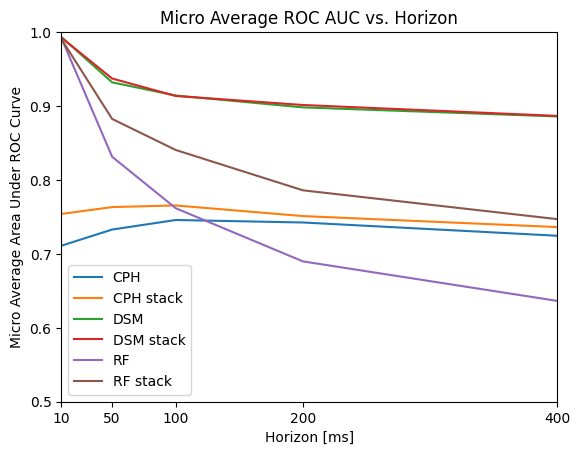

In [29]:
plot_roc_auc_vs_horizon_micro(experiment_list)

# Simple Threshold, 20ms and 100ms alarm performance.

## True Alarm Rate vs False Alarm Rate curve + enclosed area

## Warning Time vs False Alarm Rate curve

## At Best F1:
Avg + Std Warning Time:
True Alarm Rate:
False Alarm Rate:

In [ ]:
plot_TAR_vs_FAR()

# Hysteresis, 20ms and 100ms alarm performance

## True Alarm Rate vs False Alarm Rate

## Warning Time vs False Alarm Rate

## At Best F1:
Avg + Std Warning Time:
True Alarm Rate:
False Alarm Rate:

# Expected Time To Disruption (ETTD), 20ms and 100ms alarm performance

## True Alarm Rate vs False Alarm Rate

## Warning TIme vs False Alarm Rate

# One Model Type (several individual models), all above outputs plotted over Ip

In [2]:
plot_disruptive_vs_non_disruptive_shot_durations(experiment_list[0])

NameError: name 'experiment_list' is not defined